visualization 1


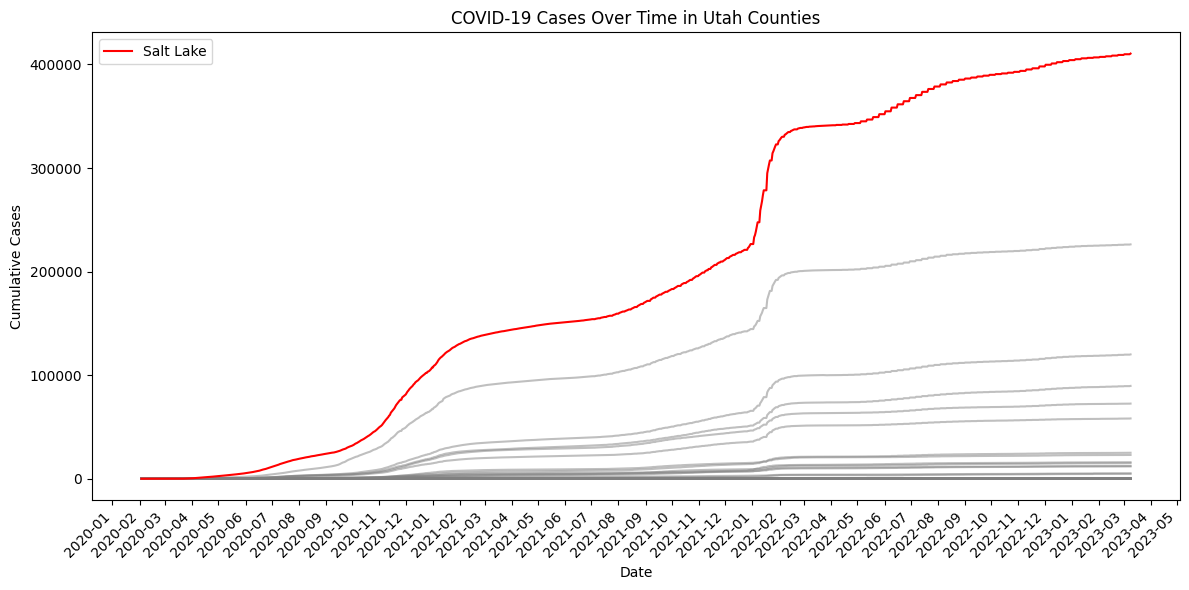

visualization 2


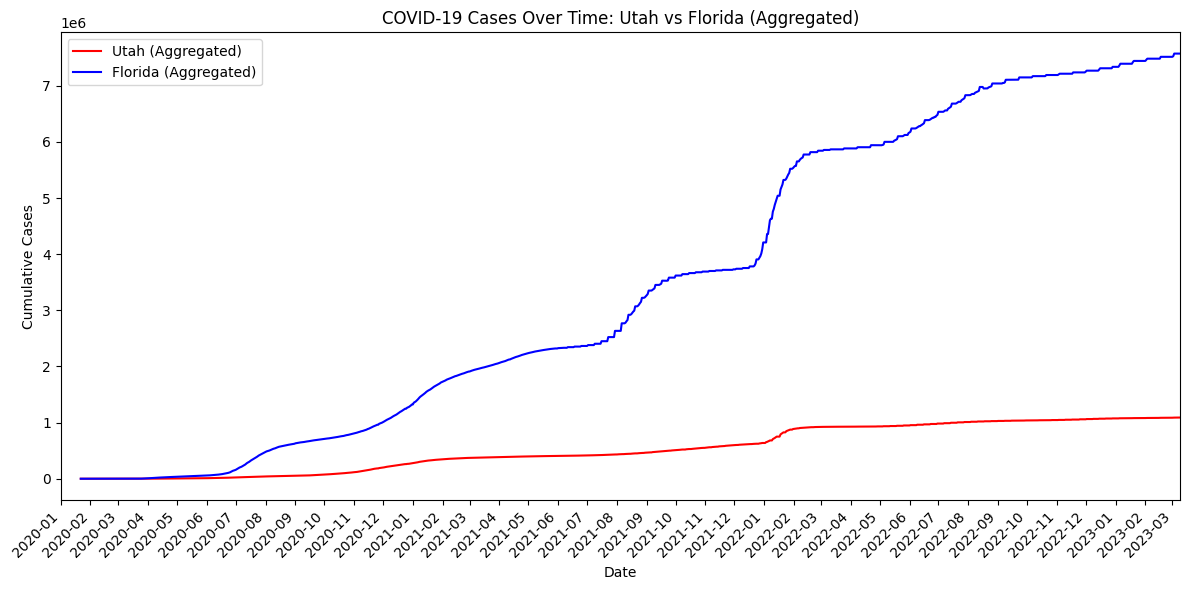

visualization 3


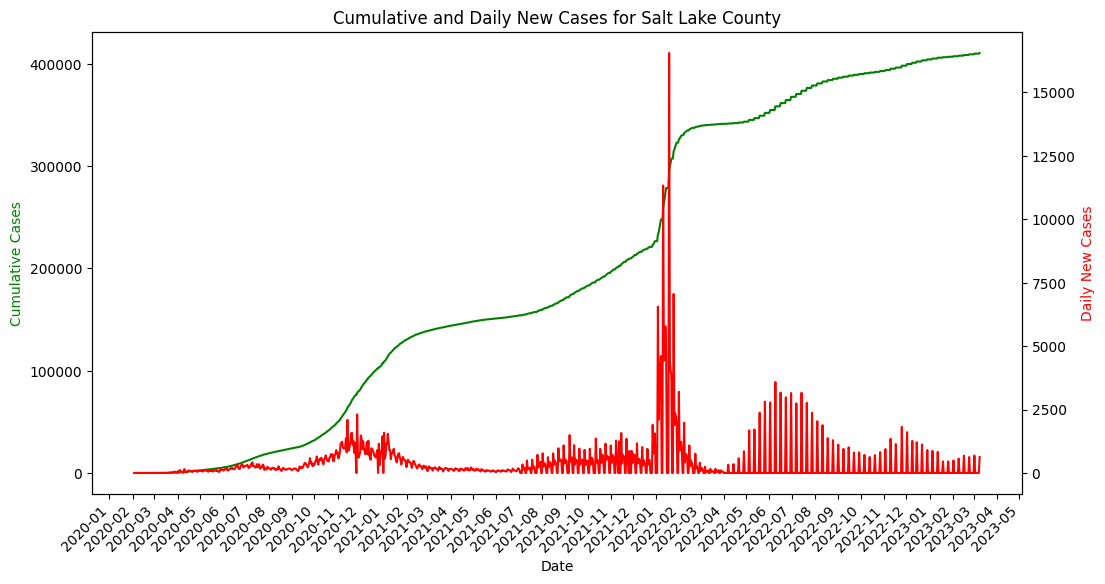

visualization 4


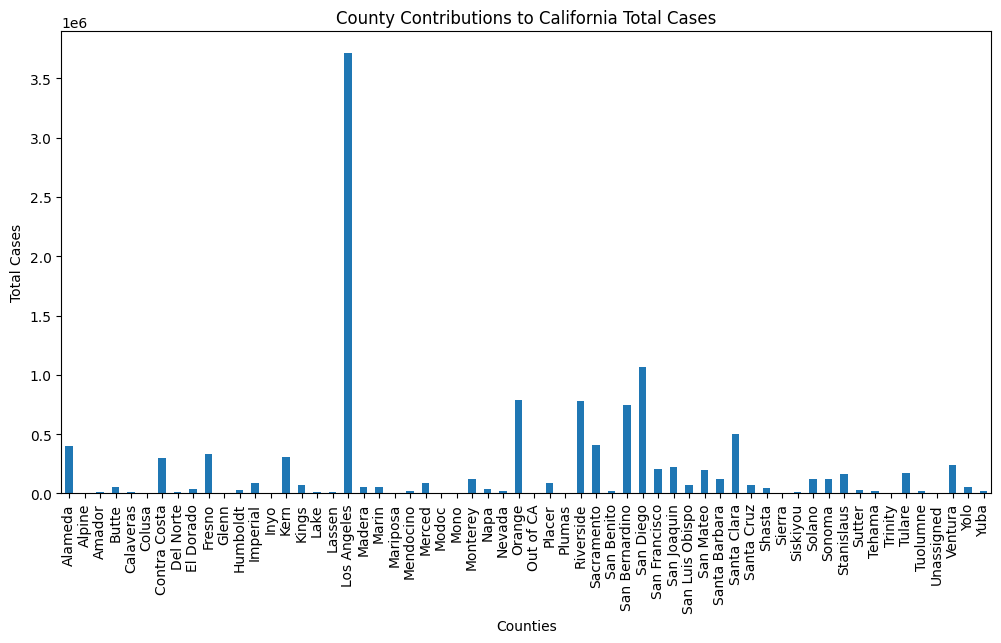

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url)


# 1 visualization
print('visualization 1')
# Filtering data for Utah
utah_data = covid_df[covid_df['Province_State'] == 'Utah']

# seperating data by county
utah_data_grouped = utah_data.groupby('Admin2').sum()

# Extract only the date columns and converting into datetime format
date_columns = utah_data_grouped.columns[11:]  # Assuming first 11 columns are metadata
utah_data_grouped = utah_data_grouped[date_columns]
utah_data_grouped.columns = pd.to_datetime(date_columns, format='%m/%d/%y')

# Select a single county to plot in a contrasting color (e.g., 'Salt Lake')
highlight_county = 'Salt Lake'
highlight_data = utah_data_grouped.loc[highlight_county].iloc[11:]

# Plotting all utah counties
plt.figure(figsize=(12, 6))
for county in utah_data_grouped.index:
    if county != highlight_county:
        plt.plot(utah_data_grouped.loc[county].iloc[11:], color='grey', alpha=0.5)
plt.plot(highlight_data, color='red', label=highlight_county)
plt.title('COVID-19 Cases Over Time in Utah Counties')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()

# Setting x-axis to show fewer ticks to improve the visualisation
ax = plt.gca()  
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  

plt.xticks(rotation=45, ha='right')  # Rotate the labels slightly to ensure the dates are clearly visible
plt.tight_layout()  

plt.show()


# visualization 2
print('visualization 2')
# Extract the date columns (they start from index 11 onward)
date_columns = covid_df.columns[11:]

# Converting the date columns to datetime format
dates = pd.to_datetime(date_columns, format='%m/%d/%y')

# The dates start from the correct start date (2020-01-01)
dates = dates[dates >= '2020-01-01']

# Filter the data for Utah and Florida
utah_data = covid_df[covid_df['Province_State'] == 'Utah'].loc[:, date_columns]
florida_data = covid_df[covid_df['Province_State'] == 'Florida'].loc[:, date_columns]

# Aggregating the case counts across counties
utah_data_aggregated = utah_data.sum(axis=0)
florida_data_aggregated = florida_data.sum(axis=0)

# Plotting the aggregated data for Utah and Florida
plt.figure(figsize=(12, 6))
plt.plot(dates, utah_data_aggregated, label='Utah (Aggregated)', color='red')
plt.plot(dates, florida_data_aggregated, label='Florida (Aggregated)', color='blue')

# title and labels
plt.title('COVID-19 Cases Over Time: Utah vs Florida (Aggregated)')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')

# Setting x-axis limits to start from 2020-01-01
plt.xlim([pd.to_datetime('2020-01-01'), dates.max()])

# Setting x-axis formatting
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')

# Adding legend explicitly
handles, labels = ax.get_legend_handles_labels()  # Fetch existing legend labels
plt.legend(handles=handles, labels=labels, loc='upper left')  # Place legend

plt.tight_layout()

# Show the plot
plt.show()


# visualization 3
print('visualization 3')
# Choosing a county (e.g., Salt Lake, Utah)
county_data = utah_data_grouped.loc[highlight_county].iloc[11:]

# Calculating daily new cases
daily_new = county_data.diff().fillna(0)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(county_data, color='green', label='Cumulative Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Cases', color='green')

# Setting major ticks to show one per month
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(daily_new, color='red', label='Daily New Cases')
ax2.set_ylabel('Daily New Cases', color='red')

plt.title('Cumulative and Daily New Cases for Salt Lake County')
plt.show()


# Visualization 4
print('visualization 4')
# Choosing California data
california_data = covid_df[covid_df['Province_State'] == 'California']
california_grouped = california_data.groupby('Admin2').sum()

# Data preparation
totals = california_grouped.iloc[:, -1]

# Plotting
totals.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('County Contributions to California Total Cases')
plt.xlabel('Counties')
plt.ylabel('Total Cases')
plt.show()


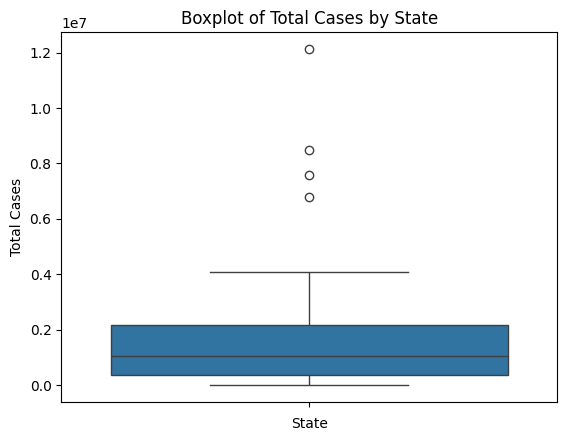

In [5]:
# extra credit visualization
import seaborn as sns
# Loading the data from the URL
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url)
# Summarizing the data by state
state_data = covid_df.groupby('Province_State').sum()
state_totals = state_data.iloc[:, -1].sort_values(ascending=False)

# Preparing data for boxplot
sns.boxplot(data=state_totals)
plt.title('Boxplot of Total Cases by State')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.show()
